# Project 1 double Pendlum
a double pendulum is supposedly would have 2 rods L1 and L2 that has a small ball attach to them. 
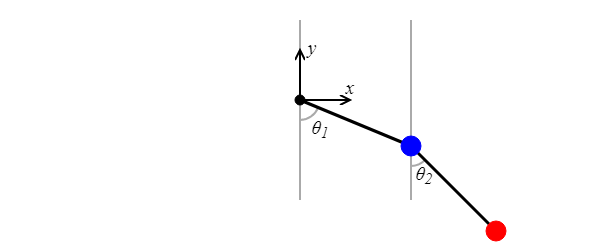

In [1]:
from vpython import *
import ode
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

### the First thing we need to do is set up the indepent values 


In [2]:
R = 1 #m
g = 9.81 #N/kg
m1 = 2 #mass of object 1
m2 = 1 #mass of object 2
L1 = 1.4 #length of rod 1
L2 = 1 #length of rod 2

## Original code for a single pendulum
this was the original code for a single pendulum so to do a double pendlum we are going to need to add a second theta and omega for the other pendulum and the arrays for them then and them to the pendulum function with a different math values

In [ ]:
def pendulum(dep, t):
    """ Calculate and return the derivative [d/dt, d^2/dt^2] evaluated as a function of y, dy/dt, and t
    where y is the dependent variable.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    dep -- an array of the dependent variable and its derivative [y, dy/dt]_n at time t
    """    
    theta = dep[0]
    omega = dep[1]
    deriv = np.zeros(2)
    deriv[0]= omega #dtheta/dt
    deriv[1]= -g/R*np.sin(theta)#domega/dt
    return deriv

g = 10 #N/kg
R = 1 #m
m = 1
#dependent variables
theta0 = np.pi/2
omega0 = 0
data = np.array([theta0, omega0]) #initialize array to store dependent variables

#independent variable
t = 0
h = 0.000001
v= 0
Nsteps = int(5/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t

tarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
omegaarr = np.zeros(Nsteps)

tarr[0] = t
thetaarr[0] = theta0
omegaarr[0] = omega0

#create a time evolution loop

for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h)#update theta and omega
    t = t + h #update the time
    
    #store the values
    tarr[n] = t
    thetaarr[n]= data[0]#store theta
    omegaarr[n]= data[1]#store omega

# Adding the second theta and omega to the array and values
Note that this thing takes a really long time to load due to the amound of calculations it has to do in part with the first and second pendlum together.

In [6]:
def pendulum(dep, t):
    """ Calculate and return the derivative of [theta1, omega1, theta2, omega2] evaluated as a function of y, dy/dt, and t
    where y is the dependent variable.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    dep -- an array of the dependent variable and its derivative [y, dy/dt]_n at time t
    """ 
    c = np.cos(dep[0]- dep[2])
    s = np.sin(dep[0]- dep[2])
    
    deriv = np.zeros(4)
    deriv[0]= dep[1] #dtheta/dt
    deriv[1]= ( m2*g*np.sin(dep[2])*c - m2*s*(L1*c*dep[1]**2 + L2*dep[3]**2) - (m1+m2)*g*np.sin(dep[0]) ) /( L1 *(m1+m2*s**2))
    deriv[2]= dep[3]
    deriv[3]= ((m1+m2)*(L1*dep[1]**2*s - g*np.sin(dep[2]) + g*np.sin(dep[0])*c) + m2*L2*dep[3]**2*s*c) / (L2 * (m1 + m2*s**2))
    return deriv


#dependent variables
theta1 = np.pi/2
theta2 = np.pi/1.8
omega1 = 0
omega2 = 0
data = np.array([theta1, omega1, theta2, omega2]) #initialize array to store dependent variables

#independent variable
t = 0
h = 0.000001
v= 0
Nsteps = int(5/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t

tarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
thetaarr2 = np.zeros(Nsteps)
omegaarr = np.zeros(Nsteps)
omegaarr2 = np.zeros(Nsteps)

tarr[0] = t
thetaarr[0] = theta1
thetaarr2[0] = theta2
omegaarr[0] = omega1
omegaarr2[0] = omega2

#create a time evolution loop

for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h)#update theta and omega
    t = t + h #update the time
    
    #store the values
    tarr[n] = t
    thetaarr[n]= data[0]#store theta
    omegaarr[n]= data[1]#store omega
    thetaarr2[n]= data[2]#store theta2
    omegaarr2[n]= data[3]#store omega2

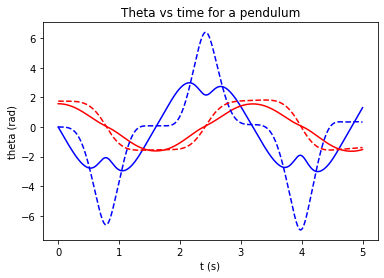

In [7]:
fig = plt.figure()
plt.title("Theta vs time for a pendulum")
plt.xlabel('t (s)')
plt.ylabel('theta (rad)')
plt.plot(tarr, omegaarr, 'b-')
plt.plot(tarr, thetaarr, 'r-')
plt.plot(tarr, omegaarr2, 'b--')
plt.plot(tarr, thetaarr2, 'r--')
plt.show()

## Animation of the model
the part thats different is that you have more elements to update and you have to think about how to update the second pendulum in part with the first one.

In [8]:
scene = canvas(titles="Double Pendulum")

xarray1 = L1*np.sin(thetaarr)
yarray1 = -L2*np.cos(thetaarr)

xarray2 = xarray1 + L2*np.sin(thetaarr2)
yarray2 = yarray1 - L2*np.cos(thetaarr2)

ball1 = sphere(pos= vec(xarray1[0], yarray1[0], 0), radius = L1*.10, make_trail=True)
rod1 = cylinder(pos = vec(0,0,0), radius = L1 * .025, axis = ball1.pos)

ball2 = sphere(pos= vec(xarray2[0], yarray2[0], 0), radius = L2*.10, make_trail=True)
rod2 = cylinder(pos = ball1.pos, radius = L2 * .025, axis = ball2.pos - ball1.pos)

scene.pause()

for n in range(1,Nsteps):
    rate(10000)
    ball1.pos = vec(xarray1[n], yarray1[n],0)
    rod1.axis = ball1.pos
    
    ball2.pos = vec(xarray2[n], yarray2[n], 0)
    rod2.pos = ball1.pos
    rod2.axis = ball2.pos - ball1.pos
    

<IPython.core.display.Javascript object>